In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
# 데이터 불러오기
df_price = pd.read_excel('result.xlsx')
df_price.head()

,year_month,importation,price,slaughter
0,200001,15869000,17558,121079
1,200002,16536000,18150,62486
2,200003,21996000,18032,74258
3,200004,18384000,16916,68224
4,200005,19097000,16780,90450


In [23]:
# data,target 설정
data = df_price['slaughter']
target = df_price['price']

In [24]:
print(data.shape)
print(target.shape)

(252,)
(252,)


In [25]:
# 계산하기 위해 2차원 데이터로 변환
data = np.array(data).reshape(-1,1)

In [26]:
data

array([[121079],
       [ 62486],
       [ 74258],
       [ 68224],
       [ 90450],
       [ 84236],
       [ 68368],
       [ 93408],
       [101784],
       [ 74388],
       [ 75650],
       [ 83000],
       [114880],
       [ 35261],
       [ 46065],
       [ 50157],
       [ 56630],
       [ 54251],
       [ 58756],
       [ 63785],
       [104247],
       [ 43011],
       [ 51729],
       [ 50473],
       [ 61945],
       [ 56998],
       [ 39807],
       [ 47563],
       [ 52528],
       [ 48553],
       [ 45442],
       [ 53205],
       [ 73843],
       [ 47501],
       [ 50943],
       [ 54696],
       [ 85870],
       [ 31869],
       [ 43461],
       [ 46105],
       [ 44025],
       [ 40719],
       [ 44183],
       [ 52904],
       [ 56362],
       [ 42785],
       [ 42772],
       [ 53198],
       [ 51816],
       [ 21959],
       [ 34822],
       [ 45710],
       [ 47576],
       [ 49165],
       [ 47834],
       [ 48848],
       [ 78724],
       [ 42975],
       [ 50952

In [27]:
print(data.shape)

(252, 1)


### data split

In [28]:
train_data, test_data, train_target, test_target = train_test_split(
data, target, test_size=0.3
)

In [29]:
len(train_data), len(train_target), len(test_data), len(test_target)

(176, 176, 76, 76)

# Linear Regression

In [30]:
model = LinearRegression()

In [31]:
# model 학습
model.fit(train_data, train_target)

LinearRegression()

In [32]:
# bias 값
model.intercept_

39591.12220919498

In [33]:
# weight 값
model.coef_

array([-0.11554865])

In [34]:
# 모델 예측
model.predict(test_data)

array([26118.95889502, 26822.76569943, 34063.96826367, 34991.47724726,
       32090.51293409, 27049.7032407 , 34332.04112301, 31999.11395489,
       27464.06068621, 33005.08046929, 32002.81151157, 30783.19555022,
       34102.44596288, 35908.70240132, 27830.11879759, 32270.30662768,
       28285.38046388, 31010.71083472, 32873.35501254, 30046.45738163,
       32055.27059697, 25866.48510293, 32569.69317015, 33164.42205249,
       34396.28617034, 31733.46761712, 31987.9057362 , 33080.99592988,
       33910.17301549, 28390.87637792, 30995.68951071, 31334.94033615,
       29139.74715437, 33698.25679824, 31689.90577748, 32906.05527944,
       31813.65837763, 34647.37337867, 32460.96189402, 33469.81712457,
       35421.54930866, 29920.85600314, 31511.96086223, 30094.17897254,
       25843.25982503, 26528.80994333, 33980.88878701, 29043.49513203,
       33521.5829181 , 32801.94594915, 31891.76926251, 35763.45775296,
       31355.0458006 , 33175.16807659, 30013.52601744, 34648.87551108,
      

### 모델 평가

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)

train_mse = mean_squared_error(train_pred, train_target)
test_mse = mean_squared_error(test_pred, test_target)

In [37]:
print(train_mse)
print(test_mse)

86750541.5502406
100040158.4164625


In [38]:
# 가독성을 위해 rms 적용
print(train_mse**(1/2))
print(test_mse**(1/2))

9313.997076993346
10002.007719276291


In [39]:
print(train_pred[:10])
print(train_target[:10])

[33946.80193636 31461.81274975 25600.60766787 31121.2908892
 31886.80067072 33078.56940831 35567.4872489  31461.00390922
 29312.3768319  30284.25649565]
55     29200
214    47340
0      17558
178    22570
141    24500
44     31200
50     30800
103    37600
224    43790
182    22480
Name: price, dtype: int64


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
data = df_price['slaughter']
target = df_price['price']

In [42]:
data = np.array(data).reshape(-1,1)

In [43]:
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2022
)
print(len(train_data))
print(len(test_data))

176
76


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [46]:
logit_regression = LogisticRegression()
logit_regression.fit(scaled_train_data, train_target)

LogisticRegression()

In [47]:
train_pred = logit_regression.predict(scaled_train_data)
test_pred = logit_regression.predict(scaled_test_data)

In [48]:
train_pred[:10]

array([21000, 21000, 22570, 31200, 31200, 21000, 21000, 22570, 22570,
       31200], dtype=int64)

In [49]:
train_target[:10]

68     37782
105    33956
155    21000
78     37142
193    28000
209    45750
25     30120
4      16780
120    30360
31     28836
Name: price, dtype: int64

### 정확도 측정

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)
print(f'train_acc is {train_acc:.2f}')
print(f'test_acc is {test_acc:.2f}')

train_acc is 0.09
test_acc is 0.09


# Hyperparameter

In [52]:
from sklearn.model_selection import GridSearchCV

In [57]:
# 탐색 범위 선정
params = [
          {"kernel":["linear"], "C":[10,30,100,300,1000,3000,10000,30000]},
          {
            "kernel":["rbf"],
            "C":[10, 30, 100, 300, 1000],
            "gamma":[0.03, 0.1, 0.3, 1.0, 3.0]
          }
]

In [58]:
params

[{'kernel': ['linear'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000]},
 {'kernel': ['rbf'],
  'C': [10, 30, 100, 300, 1000],
  'gamma': [0.03, 0.1, 0.3, 1.0, 3.0]}]

In [59]:
# 탐색 수행
from sklearn.svm import SVC
svm = SVC()
grid_cv = GridSearchCV(svm, params, cv=3, n_jobs=-1)
grid_cv.fit(scaled_train_data, train_target)

C:\Users\ITPS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000],
                          'kernel': ['linear']},
                         {'C': [10, 30, 100, 300, 1000],
                          'gamma': [0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [63]:
# 결과
# Optimized parameter
grid_cv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [61]:
# Optimized model
train_pred = grid_cv.best_estimator_.predict(scaled_train_data)
test_pred = grid_cv.best_estimator_.predict(scaled_test_data)

In [62]:
best_train_acc = accuracy_score(train_target, train_pred)
best_test_acc = accuracy_score(test_target, test_pred)
print(f'best_train_acc is {best_train_acc:.2f}')
print(f'best_test_acc is {best_test_acc:.2f}')

best_train_acc is 0.10
best_test_acc is 0.07


# Boosting_Regression

In [38]:
!pip install catboost
np.random.seed(2022)

In [47]:
data, target = df_price["slaughter"], df_price["price"]

### 1.3 Data Split

In [67]:
data = np.array(data).reshape(-1,1)

In [68]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2022
)

## 2. XGBoost

In [69]:
!pip install xgboost

In [70]:
import xgboost as xgb


xgb_reg = xgb.XGBRegressor()

### 2.1 학습

In [71]:
xgb_reg.fit(train_data, train_target)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### 2.2 예측

In [72]:
xgb_train_pred = xgb_reg.predict(train_data)
xgb_test_pred = xgb_reg.predict(test_data)

Text(0, 0.5, 'target')

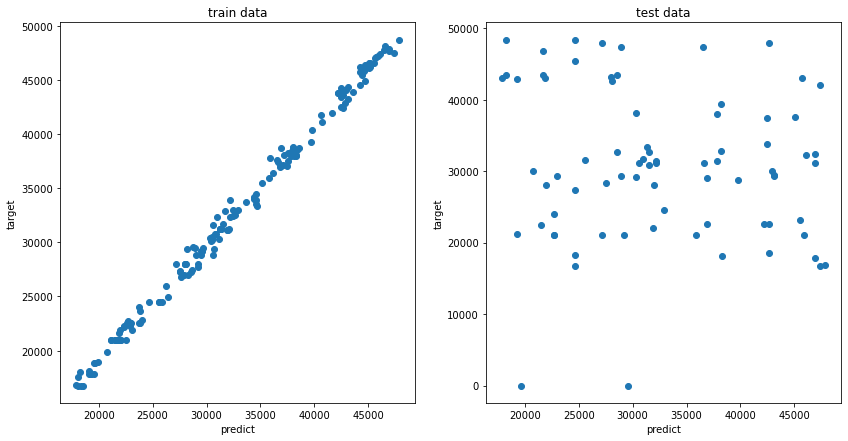

In [73]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(xgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(xgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 2.3 평가

In [74]:
from sklearn.metrics import mean_squared_error

xgb_train_mse = mean_squared_error(train_target, xgb_train_pred)
xgb_test_mse = mean_squared_error(test_target, xgb_test_pred)

In [94]:
print(f"XGBoost Train MSE is {(xgb_train_mse)**(1/2):.4f}")
print(f"XGBoost Test MSE is {(xgb_test_mse)**(1/2):.4f}")

XGBoost Train MSE is 885.9833
XGBoost Test MSE is 14753.1888


## 3. Light GBM

In [76]:
!pip install lightgbm

In [77]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()

### 3.1 학습

In [78]:
lgb_reg.fit(train_data, train_target)

LGBMRegressor()

### 3.2 예측

In [79]:
lgb_train_pred = lgb_reg.predict(train_data)
lgb_test_pred = lgb_reg.predict(test_data)

Text(0, 0.5, 'target')

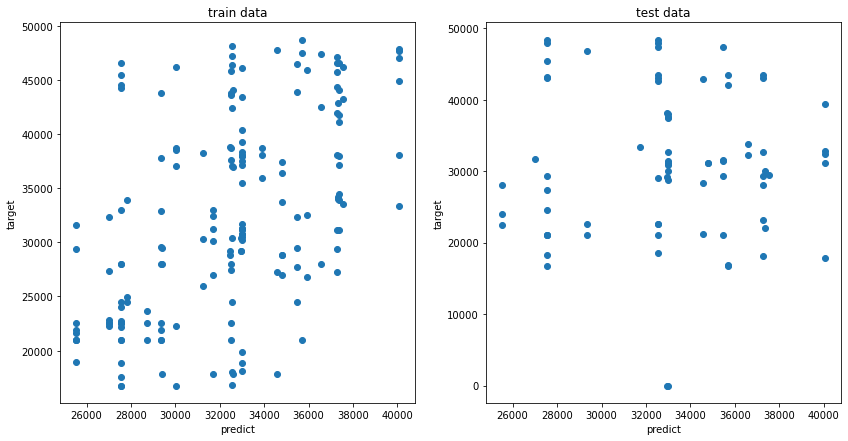

In [80]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(lgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(lgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 3.3 평가

In [81]:
lgb_train_mse = mean_squared_error(train_target, lgb_train_pred)
lgb_test_mse = mean_squared_error(test_target, lgb_test_pred)

In [96]:
print(f"Light Boost Train MSE is {(lgb_train_mse)**(1/2):.4f}")
print(f"Light Boost Test MSE is {(lgb_test_mse)**(1/2):.4f}")

Light Boost Train MSE is 7890.9649
Light Boost Test MSE is 11338.2210


## 4. CatBoost

In [83]:
import catboost as cb


cb_reg = cb.CatBoostRegressor()

### 4.1 학습

In [84]:
cb_reg.fit(train_data, train_target, verbose=False)

### 4.2 예측

In [85]:
cb_train_pred = cb_reg.predict(train_data)
cb_test_pred = cb_reg.predict(test_data)

Text(0, 0.5, 'target')

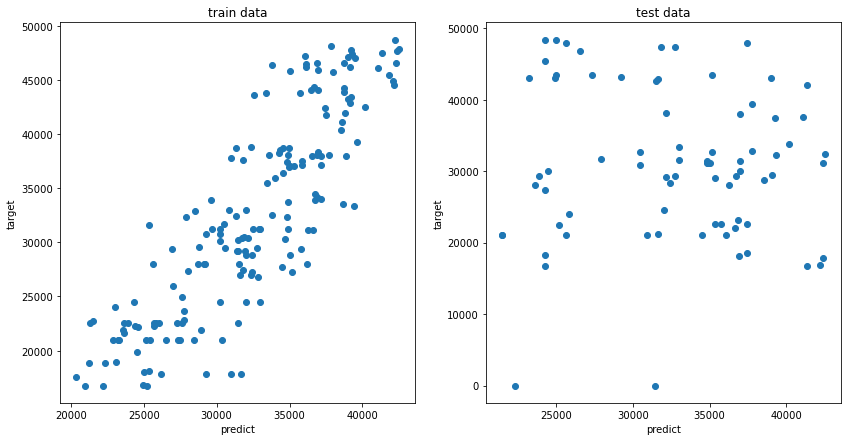

In [86]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(cb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(cb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 4.3 평가

In [87]:
cb_train_mse = mean_squared_error(train_target, cb_train_pred)
cb_test_mse = mean_squared_error(test_target, cb_test_pred)

In [97]:
print(f"Cat Boost Train MSE is {(cb_train_mse)**(1/2):.4f}")
print(f"Cat Boost Test MSE is {(cb_test_mse)**(1/2):.4f}")

Cat Boost Train MSE is 5291.0137
Cat Boost Test MSE is 12420.1979


## 5. 마무리


In [99]:
print(f"XGBoost Test MSE is {(xgb_test_mse)**(1/2):.4f}")
print(f"Light Boost Test MSE is {(lgb_test_mse)**(1/2):.4f}")
print(f"Cat Boost Test MSE is {(cb_test_mse)**(1/2):.4f}")

XGBoost Test MSE is 14753.1888
Light Boost Test MSE is 11338.2210
Cat Boost Test MSE is 12420.1979
